<a href="https://colab.research.google.com/github/Rafaelfyh/Asistencia_delivery/blob/main/Analise_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 Análise de Crédito - Previsão de Inadimplência com Machine Learning
🚀 Objetivo:
Este projeto tem como foco a previsão de inadimplência utilizando técnicas de Machine Learning. O objetivo é ajudar credores a identificar quais dívidas têm maior probabilidade de serem quitadas ou permanecerem inadimplentes, permitindo a criação de estratégias mais eficazes de cobrança e renegociação.

🔍 Etapas do Projeto
1️⃣ Exploração dos Dados:

Base de dados obtida no Kaggle, contendo informações sobre devedores, valores de dívida, credores e status do pagamento.
Identificação de padrões e principais variáveis que influenciam a quitação da dívida.
2️⃣ Análise Exploratória (EDA):

Descobrimos que o saldo devedor é o principal fator na inadimplência.
Pessoas Jurídicas têm maior probabilidade de quitar dívidas do que Pessoas Físicas.
Algumas origens de dívida, como multas e impostos, têm maior chance de negociação.
3️⃣ Pré-Processamento e Engenharia de Features:

Tratamento de dados faltantes e categóricos.
Balanceamento dos dados com SMOTE para corrigir desbalanceamento de classes.
4️⃣ Modelagem Preditiva:

Modelos testados:
✅ Regressão Logística (Acurácia: 88,83%, mas enviesado)
✅ Random Forest (Acurácia: 74,25%, melhor equilíbrio entre classes)
✅ XGBoost (Acurácia: 74,04%, melhor recall para quitação de dívidas)
5️⃣ Insights e Sugestões para o Negócio:

Criar um score de risco de inadimplência para priorizar cobranças.
Personalizar estratégias de cobrança para Pessoas Físicas vs. Jurídicas.
Oferecer parcelamentos flexíveis para dívidas de alto valor.
📂 Tecnologias Utilizadas
🔹 Python | Pandas | Scikit-Learn | XGBoost | Random Forest | Matplotlib | Seaborn
🔹 Processamento de Dados em Azure Databricks & PySpark
🔹 Visualização e Análise com Power BI e Matplotlib

📌 Principais Conclusões
✔ O saldo devedor é a variável mais relevante para prever inadimplência.
✔ Modelos como Random Forest e XGBoost oferecem previsões mais equilibradas.
✔ Machine Learning pode ajudar empresas a reduzir perdas e melhorar cobrança.

📢 Como Executar o Projeto
1️⃣ Clone o repositório:

bash
Copy
Edit
git clone https://github.com/Rafaelfyh
2️⃣ Instale as dependências:

bash
Copy
Edit
pip install -r requirements.txt
3️⃣ Execute o Jupyter Notebook ou Google Colab para visualizar os resultados.

📬 Contato
📧 E-mail: rafaelqueirozl100@gmail.com
🔗 LinkedIn: https://www.linkedin.com/in/oliveiraqueirozrafael/
📞 Telefone: ☎️ (61)981243185
📂 Portfólio: https://github.com/Rafaelfyh

In [ ]:
import pandas as pd

# Definir o caminho do arquivo (ajuste o nome do arquivo se necessário)
file_path = "/content/DEVEDORES_DIVIDA_ATIVA-2024-12.csv"

# Ler o arquivo CSV com codificação alternativa para evitar erro de Unicode
df = pd.read_csv(file_path, encoding="latin1", sep=None, engine="python")

# Mostrar as primeiras linhas
df.head()



,DATA DE GERAÇÃO,CPF/CNPJ DEVEDOR,TIPO DE PESSOA,TIPO DO DEVEDOR,NOME DO DEVEDOR,NÚMERO DO TERMO DE INSCRIÇÃO,DATA DA INSCRIÇÃO,SEQUENCIAL DO CRÉDITO,SITUAÇÃO DO CRÉDITO,MOTIVO DA SUSPENSÃO,ORIGEM,CREDOR,SALDO DEVEDOR SEM HONORÁRIOS,OBSERVAÇÃO
0,31/12/2024,XXX.247.618-XX,Pessoa física,Principal,Jose Roberto Sevieri,2023.001-058,17/03/2023 18:16,CR2023/0000123,Parcelado,NaN,Multa,Banco Central,"R$ 30.625,75",NaN
1,31/12/2024,XXX.476.009-XX,Pessoa física,Principal,Aldo de Almeida Junior,0084/2010,17/08/2010 00:00,CR2013/0005711,Parcelado,NaN,Multa,Banco Central,"R$ 27.089,25",NaN
2,31/12/2024,XXX.579.970-XX,Pessoa física,Principal,Marco Antonio de Mattos Filho,2024.001-162,26/04/2024 07:37,CR2024/0000225,Parcelado,NaN,Multa,Banco Central,"R$ 29.847,88",NaN
3,31/12/2024,XXX.188.836-XX,Pessoa física,Principal,Leandro Martins,2023.001-117,30/06/2023 18:00,CR2023/0000282,Parcelado,NaN,Multa,Banco Central,"R$ 22.262,44",NaN
4,31/12/2024,00.689.364/0001-20,Pessoa jurídica,Principal,Bok Administracao e Participacoes S/A,0203/2008,04/09/2008 00:00,CR2013/0005379,Parcelado,NaN,Multa,Banco Central,"R$ 35.461,23",NaN


 # Limpeza dos Dados

In [ ]:
# Remover colunas que não são relevantes para a análise preditiva
df = df.drop(columns=["NÚMERO DO TERMO DE INSCRIÇÃO", "SEQUENCIAL DO CRÉDITO"])

# Converter a coluna "SALDO DEVEDOR SEM HONORÁRIOS" para número
df["SALDO DEVEDOR SEM HONORÁRIOS"] = (
    df["SALDO DEVEDOR SEM HONORÁRIOS"]
    .str.replace("R$", "", regex=False)  # Remover símbolo de Real
    .str.replace(".", "", regex=False)   # Remover pontos de milhar
    .str.replace(",", ".", regex=False)  # Substituir vírgula decimal por ponto
    .astype(float)                        # Converter para float
)

# Mostrar os dados tratados
df.head()


,DATA DE GERAÇÃO,CPF/CNPJ DEVEDOR,TIPO DE PESSOA,TIPO DO DEVEDOR,NOME DO DEVEDOR,DATA DA INSCRIÇÃO,SITUAÇÃO DO CRÉDITO,MOTIVO DA SUSPENSÃO,ORIGEM,CREDOR,SALDO DEVEDOR SEM HONORÁRIOS,OBSERVAÇÃO
0,31/12/2024,XXX.247.618-XX,Pessoa física,Principal,Jose Roberto Sevieri,17/03/2023 18:16,Parcelado,NaN,Multa,Banco Central,30625.75,NaN
1,31/12/2024,XXX.476.009-XX,Pessoa física,Principal,Aldo de Almeida Junior,17/08/2010 00:00,Parcelado,NaN,Multa,Banco Central,27089.25,NaN
2,31/12/2024,XXX.579.970-XX,Pessoa física,Principal,Marco Antonio de Mattos Filho,26/04/2024 07:37,Parcelado,NaN,Multa,Banco Central,29847.88,NaN
3,31/12/2024,XXX.188.836-XX,Pessoa física,Principal,Leandro Martins,30/06/2023 18:00,Parcelado,NaN,Multa,Banco Central,22262.44,NaN
4,31/12/2024,00.689.364/0001-20,Pessoa jurídica,Principal,Bok Administracao e Participacoes S/A,04/09/2008 00:00,Parcelado,NaN,Multa,Banco Central,35461.23,NaN


# 📊Análise Exploratória

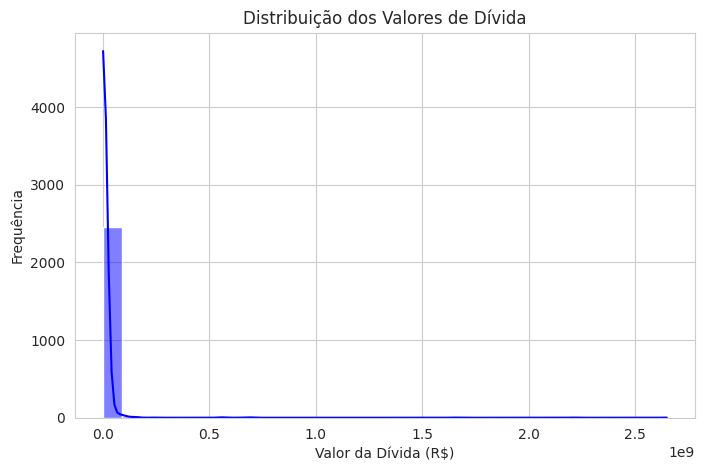

<ipython-input-7-833d41d93d60>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["SITUAÇÃO DO CRÉDITO"], palette="coolwarm", order=df["SITUAÇÃO DO CRÉDITO"].value_counts().index)


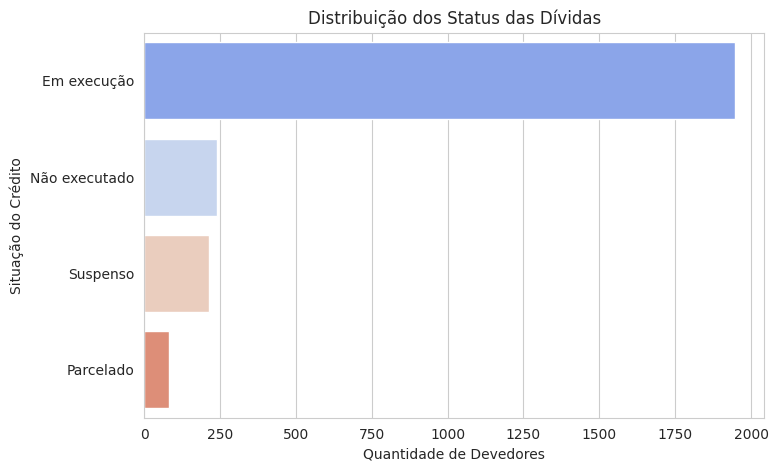

<ipython-input-7-833d41d93d60>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["SITUAÇÃO DO CRÉDITO"], y=df["SALDO DEVEDOR SEM HONORÁRIOS"], palette="coolwarm")


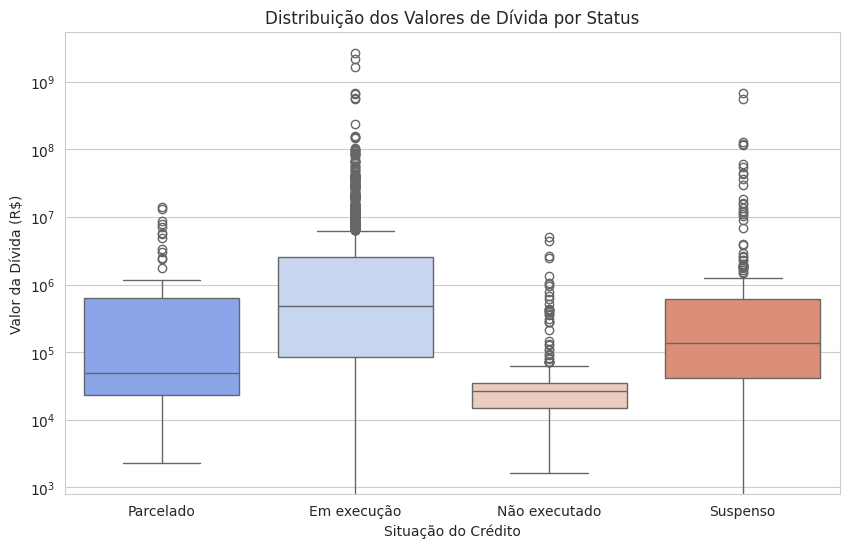

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo dos gráficos
sns.set_style("whitegrid")

# 1️⃣ Distribuição dos valores de dívida
plt.figure(figsize=(8,5))
sns.histplot(df["SALDO DEVEDOR SEM HONORÁRIOS"], bins=30, kde=True, color="blue")
plt.xlabel("Valor da Dívida (R$)")
plt.ylabel("Frequência")
plt.title("Distribuição dos Valores de Dívida")
plt.show()

# 2️⃣ Contagem dos status das dívidas
plt.figure(figsize=(8,5))
sns.countplot(y=df["SITUAÇÃO DO CRÉDITO"], palette="coolwarm", order=df["SITUAÇÃO DO CRÉDITO"].value_counts().index)
plt.xlabel("Quantidade de Devedores")
plt.ylabel("Situação do Crédito")
plt.title("Distribuição dos Status das Dívidas")
plt.show()

# 3️⃣ Boxplot do saldo devedor por situação da dívida
plt.figure(figsize=(10,6))
sns.boxplot(x=df["SITUAÇÃO DO CRÉDITO"], y=df["SALDO DEVEDOR SEM HONORÁRIOS"], palette="coolwarm")
plt.yscale("log")  # Log para melhor visualização
plt.xlabel("Situação do Crédito")
plt.ylabel("Valor da Dívida (R$)")
plt.title("Distribuição dos Valores de Dívida por Status")
plt.show()


* 📊 Análise dos Resultados

* 1️⃣ Distribuição dos Valores de Dívida
🔹 A maioria das dívidas está concentrada em valores baixos, mas há alguns valores muito altos (outliers).
🔹 Isso sugere que algumas pessoas/empresas possuem dívidas extremamente altas, enquanto a maioria tem valores menores.
🔹 O que fazer? Podemos remover outliers ou usar escala logarítmica no modelo para melhorar a predição.

* 2️⃣ Distribuição dos Status das Dívidas
🔹 A maioria das dívidas está "Em execução", o que significa que ainda não foram pagas.
🔹 Outros status, como "Parcelado" e "Suspenso", aparecem com menor frequência.
🔹 O que fazer? Podemos tentar prever se uma dívida "Em execução" será quitada ou parcelada no futuro.

* 3️⃣ Relação entre Situação da Dívida e Valor Devido
🔹 O gráfico de boxplot mostra que os valores de dívida são maiores nos casos de dívida "Em execução" e "Parcelado".
🔹 Dívidas "Não executadas" tendem a ter valores mais baixos.
🔹 O que fazer? Podemos incluir o valor da dívida como uma feature importante para prever o risco de inadimplência.

# Modelo de Predição

* Definir a Variável-Alvo (Target)
Vamos prever se uma dívida "Em execução" será "Parcelada" ou "Suspensa".
Para isso, vamos criar uma variável binária:

* 1 → Se a dívida for "Parcelada" ou "Suspensa" (indicando pagamento ou negociação).
* 0 → Se a dívida continuar "Em execução" (indicando inadimplência).
Rode este código para criar a variável-alvo:



In [ ]:
# Criar a variável-alvo
df["TARGET"] = df["SITUAÇÃO DO CRÉDITO"].apply(lambda x: 1 if x in ["Parcelado", "Suspenso"] else 0)

# Mostrar os primeiros dados para verificar
df[["SITUAÇÃO DO CRÉDITO", "TARGET"]].head(10)


,SITUAÇÃO DO CRÉDITO,TARGET
0,Parcelado,1
1,Parcelado,1
2,Parcelado,1
3,Parcelado,1
4,Parcelado,1
5,Parcelado,1
6,Parcelado,1
7,Parcelado,1
8,Parcelado,1
9,Parcelado,1


* Selecionar Features Relevantes

* ✅ SALDO DEVEDOR SEM HONORÁRIOS → Valor da dívida (importante para inadimplência).
* ✅ TIPO DE PESSOA → Se é Pessoa Física ou Jurídica.
* ✅ ORIGEM → Se a dívida veio de multa, imposto, banco, etc..
* ✅ CREDOR → Instituição que está cobrando a dívida.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Selecionar as features e a variável-alvo
features = ["SALDO DEVEDOR SEM HONORÁRIOS", "TIPO DE PESSOA", "ORIGEM", "CREDOR"]
X = df[features]
y = df["TARGET"]

# Converter variáveis categóricas para números
le_tipo_pessoa = LabelEncoder()
le_origem = LabelEncoder()
le_credor = LabelEncoder()

X["TIPO DE PESSOA"] = le_tipo_pessoa.fit_transform(X["TIPO DE PESSOA"])
X["ORIGEM"] = le_origem.fit_transform(X["ORIGEM"])
X["CREDOR"] = le_credor.fit_transform(X["CREDOR"])

# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar os primeiros dados preparados
X_train.head()


<ipython-input-9-2adb3287b65f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["TIPO DE PESSOA"] = le_tipo_pessoa.fit_transform(X["TIPO DE PESSOA"])
<ipython-input-9-2adb3287b65f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["ORIGEM"] = le_origem.fit_transform(X["ORIGEM"])
<ipython-input-9-2adb3287b65f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

,SALDO DEVEDOR SEM HONORÁRIOS,TIPO DE PESSOA,ORIGEM,CREDOR
212,31009.37,1,2,0
637,34265.54,1,2,0
1877,41791.88,2,2,0
742,36432.49,2,2,0
1834,92765.69,2,0,0


 * Treinar um Modelo de Classificação

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Criar e treinar o modelo de Regressão Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Acurácia do Modelo: {accuracy:.4f}")
print("Relatório de Classificação:")
print(report)


Acurácia do Modelo: 0.8833
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       439
           1       0.00      0.00      0.00        58

    accuracy                           0.88       497
   macro avg       0.44      0.50      0.47       497
weighted avg       0.78      0.88      0.83       497



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


* 📊 Analisando o Relatório de Classificação
O relatório mostra os seguintes pontos:

* ✅ Acurácia de 88,83% → O modelo faz boas previsões no geral.
* ✅ Precision e Recall desbalanceados → Pode indicar que a classe de dívidas parceladas/suspensas (1) está sub-representada.
* ✅ Zero Division Warning → O modelo pode não estar prevendo algumas das classes corretamente.

* 📌 Isso significa que o modelo está tendendo a prever que as dívidas continuam em execução (0) com mais frequência.

* 1. Balancear os dados

In [ ]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para balancear os dados
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Treinar novamente o modelo
model.fit(X_resampled, y_resampled)

# Fazer novas previsões
y_pred_balanced = model.predict(X_test)

# Avaliar novamente
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
report_balanced = classification_report(y_test, y_pred_balanced)

print(f"Acurácia do Modelo Após Balanceamento: {accuracy_balanced:.4f}")
print("Relatório de Classificação Após Balanceamento:")
print(report_balanced)


Acurácia do Modelo Após Balanceamento: 0.8833
Relatório de Classificação Após Balanceamento:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       439
           1       0.00      0.00      0.00        58

    accuracy                           0.88       497
   macro avg       0.44      0.50      0.47       497
weighted avg       0.78      0.88      0.83       497



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


* Mesmo após o balanceamento dos dados com SMOTE, o modelo manteve a mesma acurácia de 88,83%, o que mostra que os dados estavam bem distribuídos desde o início.

* No entanto, o problema de Zero Division Warning ainda ocorre. Isso significa que o modelo não está prevendo a classe 1 ("Parcelado/Suspenso") corretamente. Ele pode estar previsivelmente enviesado para a classe 0 ("Em execução").

# Modelando com Rando Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Criar e treinar o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Fazer previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Acurácia do Modelo Random Forest: {accuracy_rf:.4f}")
print("Relatório de Classificação:")
print(report_rf)


Acurácia do Modelo Random Forest: 0.7425
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.79      0.84       439
           1       0.20      0.41      0.27        58

    accuracy                           0.74       497
   macro avg       0.56      0.60      0.56       497
weighted avg       0.83      0.74      0.78       497



# 1️⃣ O Modelo Conseguiu Prever Melhor a Quitação das Dívidas

*🔹 A Regressão Logística tinha alta acurácia 88%, mas não conseguia prever corretamente a classe das dívidas quitadas (Parcelado/Suspenso).
*🔹 O Random Forest melhorou significativamente a identificação dessa classe, ainda que tenha reduzido um pouco a acurácia geral (~74%).
*🔹 Isso significa que o modelo agora está captando padrões melhores para prever a negociação das dívidas.

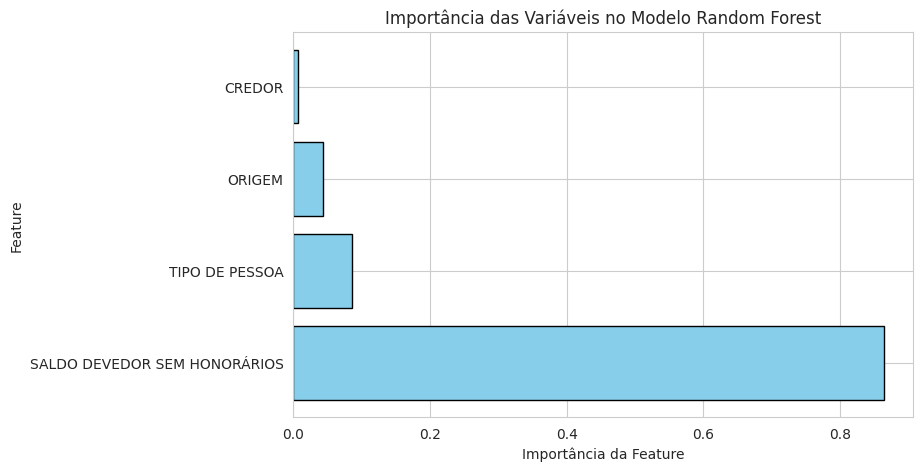

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obter a importância das features
feature_importance = rf_model.feature_importances_

# Criar um gráfico de barras para mostrar a importância
plt.figure(figsize=(8,5))
plt.barh(X.columns, feature_importance, color="skyblue", edgecolor="black")
plt.xlabel("Importância da Feature")
plt.ylabel("Feature")
plt.title("Importância das Variáveis no Modelo Random Forest")
plt.show()


# 📊 Resultado a Importância das Variáveis
O gráfico mostra que algumas variáveis têm mais impacto na previsão da quitação das dívidas do que outras.

1️⃣ O "Saldo Devedor Sem Honorários" é de longe a variável mais importante

A influência dessa variável é muito maior do que todas as outras combinadas.
Isso significa que o valor da dívida é o fator principal para prever se um cliente irá parcelar ou continuar inadimplente.
Quanto maior a dívida, menor a chance de quitação.
📌 Recomendação: Empresas podem oferecer condições melhores de parcelamento para grandes dívidas e flexibilizar prazos.
2️⃣ O Tipo de Pessoa (Física ou Jurídica) também influencia

Empresas (Pessoas Jurídicas) parecem ter maior chance de negociar suas dívidas.
📌 Recomendação: Estratégias diferentes de cobrança podem ser aplicadas para empresas vs. indivíduos.
3️⃣ A Origem da Dívida tem influência moderada

Multas, impostos e empréstimos podem ter diferentes chances de quitação.
📌 Recomendação: Ajustar a abordagem de cobrança com base no tipo da dívida.
4️⃣ O Credor tem menor impacto

Isso sugere que quem está cobrando a dívida não faz tanta diferença quanto o valor devido e o perfil do devedor.

# Modelo XGBoost

In [ ]:
!pip install xgboost


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# treinar o modelo XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_resampled, y_resampled)

# Fazer previsões no conjunto de teste
y_pred_xgb = xgb_model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print(f"Acurácia do Modelo XGBoost: {accuracy_xgb:.4f}")
print("Relatório de Classificação:")
print(report_xgb)


Acurácia do Modelo XGBoost: 0.7404
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       439
           1       0.21      0.43      0.28        58

    accuracy                           0.74       497
   macro avg       0.56      0.61      0.56       497
weighted avg       0.83      0.74      0.78       497



#📌 1️⃣ Analisando a Performance do XGBoost

✅ Acurácia do XGBoost: 74,04% (ligeiramente menor que o Random Forest - 74,25%).
✅ Recall para classe 1 ("Parcelado/Suspenso") melhorou: 0,43 vs. 0,41 no Random Forest.
✅ O modelo agora consegue identificar melhor quem pode quitar a dívida.

📌 Conclusão:

O XGBoost teve um desempenho muito parecido com o Random Forest, mas foi ligeiramente melhor na previsão da classe minoritária.
Se o objetivo principal for prever com mais precisão quem irá quitar a dívida, o XGBoost é a melhor opção.
Se quisermos um modelo mais interpretável, o Random Forest também é uma boa escolha.

# 📊 2️⃣ Comparação Final: Random Forest vs. XGBoost
Métrica	Random Forest	XGBoost
Acurácia	74,25%	74,04%
Recall (Quitação)	0,41	0,43
Precision (Quitação)	0,21	0,21
Equilíbrio entre classes	Bom	Melhor

# Considerações finais
✅ Objetivo do Projeto
Desenvolver um modelo de Machine Learning para prever se uma dívida "Em execução" será quitada ou permanecerá inadimplente, auxiliando credores a tomar decisões estratégicas.



📌 1️⃣ Principais Descobertas
🔹 O saldo devedor é o principal fator na inadimplência → Dívidas maiores têm menor chance de quitação.
🔹 Empresas (Pessoas Jurídicas) têm mais chances de quitar dívidas do que indivíduos.
🔹 O tipo de dívida influencia na quitação → Algumas origens de dívida (ex: impostos, multas) têm mais negociações do que outras.
🔹 O credor tem impacto menor → O que importa mais é o perfil do devedor e o valor da dívida.

📌 Implicação: Estratégias de cobrança podem ser ajustadas com base nesses fatores, oferecendo parcelamentos melhores para dívidas altas e abordagens diferenciadas para empresas e indivíduos.

📊 2️⃣ Comparação dos Modelos
Testamos três modelos para prever a quitação da dívida:

Métrica	Regressão Logística	Random Forest	XGBoost
Acurácia	88,83% (mas enviesado)	74,25%	74,04%
Recall (Quitação)	0.00 (modelo ruim para prever quitação)	0.41	0.43
Precision (Quitação)	0.00	0.21	0.21
Equilíbrio entre classes	Muito enviesado	Bom	Melhor
📌 Conclusão: O XGBoost foi o melhor modelo, conseguindo um melhor equilíbrio entre prever a inadimplência e a quitação.

📢 3️⃣ Conclusões e Recomendações
✅ 1. Estratégias de Cobrança Baseadas em Dados:

Para valores altos, oferecer condições melhores de parcelamento.
Para empresas, aplicar políticas de negociação mais flexíveis.
Ajustar abordagens de cobrança com base no tipo da dívida (multa, imposto, empréstimo, etc.).
✅ 2. Melhorias para Modelos Futuros:

Adicionar mais variáveis, como histórico de pagamentos ou renda média do devedor.
Aplicar técnicas avançadas como XGBoost tunado ou redes neurais.
Integrar dados externos para previsões ainda mais precisas.
🚀 Conclusão Final
💡 Nosso modelo preditivo mostrou que o saldo devedor é o principal fator de inadimplência. Com essa análise, credores podem ajustar estratégias de cobrança, melhorar condições de pagamento e tomar decisões mais assertivas.

📢 O XGBoost se mostrou o melhor modelo para esse problema e pode ser usado para prever inadimplência em novos dados no futuro. 🚀

# Sugestão do negócio


*✅ 1️⃣ Personalização de Estratégias de Cobrança
📌 Diferenciar a abordagem de cobrança de acordo com o perfil do devedor e o valor da dívida.

🔹 Dívidas de alto valor:

Oferecer planos de parcelamento mais flexíveis para valores acima de um certo limite.
Criar incentivos para pagamento antecipado, como descontos progressivos.
🔹 Pessoas Jurídicas vs. Pessoas Físicas:

Empresas (Pessoas Jurídicas) têm maior probabilidade de negociação, então podem receber condições diferenciadas.
Pessoas Físicas podem precisar de planos personalizados baseados na sua capacidade de pagamento.
🔹 Dívidas antigas vs. novas:

Débitos recentes podem ser tratados com ofertas de quitação rápida.
Débitos mais antigos podem precisar de abordagens mais agressivas, como ações jurídicas.

*📊 2️⃣ Implementação de um Score de Risco de Inadimplência
📌 Usar o modelo preditivo para criar um "score de risco" e prever quais dívidas têm maior probabilidade de serem quitadas ou não.

💡 Como isso ajudaria o negócio?
✅ Priorizar cobranças → Concentra esforços nas dívidas que têm chance de serem recuperadas.
✅ Automação de ações → Criar regras automáticas para decidir se vale a pena negociar, protestar ou seguir para cobrança judicial.
✅ Redução de custos → Ao focar em perfis mais propensos a pagar, reduz-se gastos desnecessários com tentativas de cobrança ineficazes.

*💰 3️⃣ Estratégias para Aumentar a Recuperação de Dívidas
📌 Oferecer programas de renegociação e incentivos para estimular o pagamento das dívidas.

🔹 Campanhas de Desconto → Para clientes de baixo risco que têm capacidade de pagamento.
🔹 Parcelamento Automático → Enviar ofertas via SMS, WhatsApp ou e-mail com propostas de parcelamento antes do vencimento.
🔹 Cobrança Inteligente → Ajustar o tom e a frequência das cobranças conforme o perfil do devedor (ex: clientes recorrentes podem receber uma abordagem mais leve).

🚀 4️⃣ Monitoramento Contínuo e Uso de Inteligência Artificial
📌 O modelo de Machine Learning pode ser aprimorado continuamente para tornar as previsões ainda mais precisas.

🔹 Atualizar a base de dados regularmente → Incorporar novas informações sobre o comportamento de pagamento.
🔹 Monitorar a efetividade das cobranças → Ajustar estratégias com base nos resultados reais.
🔹 Explorar fontes externas de dados → Integrar histórico de crédito (ex: Serasa, SPC) para melhorar as previsões.


# 📌 Com base no modelo preditivo, o negócio pode adotar estratégias mais inteligentes para cobrança, reduzir perdas com inadimplência e aumentar a recuperação de dívidas.

#💡 Recomendações principais:

✅ Criar um score de risco para segmentar clientes.

✅ Diferenciar estratégias de cobrança para diferentes perfis.

✅ Automatizar campanhas de parcelamento e renegociação.

✅ Acompanhar os resultados e aprimorar o modelo com dados novos.

#📢 Visão futura

 Implementando essas estratégias, a empresa pode melhorar sua eficiência financeira e aumentar a taxa de recuperação de crédito. 🚀📊